Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Finding Determinants and Predicting Price of Airbnb Listings in Amsterdam

COLLABORATORS = Abigail Abigail, Seyda Betul Aydin

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datascience-for-Economics-Final-Assignment" data-toc-modified-id="Datascience-for-Economics-Final-Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datascience for Economics Final Assignment</a></span></li><li><span><a href="#Research-question-(0.5-points)" data-toc-modified-id="Research-question-(0.5-points)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research question (0.5 points)</a></span></li><li><span><a href="#Motivation-(0.5-points)" data-toc-modified-id="Motivation-(0.5-points)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motivation (0.5 points)</a></span></li><li><span><a href="#Method-and-data-(1.0-point)" data-toc-modified-id="Method-and-data-(1.0-point)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Method and data (1.0 point)</a></span></li><li><span><a href="#Preview-of-the-answers-(0.5-points)" data-toc-modified-id="Preview-of-the-answers-(0.5-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preview of the answers (0.5 points)</a></span></li><li><span><a href="#Main-assumptions-(0.5-points)" data-toc-modified-id="Main-assumptions-(0.5-points)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Main assumptions (0.5 points)</a></span></li><li><span><a href="#Python/R-code-(6-points)" data-toc-modified-id="Python/R-code-(6-points)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Python/R code (6 points)</a></span></li><li><span><a href="#Robustness-analysis-(0.5-points)" data-toc-modified-id="Robustness-analysis-(0.5-points)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Robustness analysis (0.5 points)</a></span></li><li><span><a href="#Discussion-and-conclusion-(0.5-points)" data-toc-modified-id="Discussion-and-conclusion-(0.5-points)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Discussion and conclusion (0.5 points)</a></span></li></ul></div>

For this problem set, we'll be using the Jupyter notebook:

![](jupyter.png)

# Datascience for Economics Final Assignment

|Name|SNR|ANR|
|----|---|----|
|Abigail Abigail|2039571|u115474|
|Seyda Betul Aydin|2046831|u149722|

# Research question (0.5 points)

*Formulate the research question: what question do you want to answer in this assignment?*

1. What are the determinants of Airbnb nightly price in Amsterdam?
2. Which method provides the more accurate result while making prediction of the Airbnb nightly price?

# Motivation (0.5 points)

The city Amsterdam is one of the top tourist destinations in Europe. In 2018 alone, 19 million tourists visited this city of 850,000 inhabitants ([DW, 2019](https://www.dw.com/en/how-amsterdam-is-fighting-mass-tourism/a-47806959#:~:text=Last%20year%2019%20million%20tourists,expects%2029%20million%20in%202025.&text=Many%20Amsterdam%20locals%20have%20had%20enough%20of%20the%20masses%20of%20tourists.)). Cheap flights and quick easy online booking are the reasons behind this influx of tourists. This comes with a cost of city's liveability for the locals. Therefore, the local government limits the homeowners to sublet their property via booking platforms (such as Airbnb) for no more than 30 days a year.

Airbnb is a home-sharing platform that allows property owners (called as ‘hosts’) to put their listings online, so that guests can book and pay to have a stay there. Hosts are expected to set their own prices for their listings. Although Airbnb and other sites provide some general guidance, there are currently no free and accurate services which help hosts price their properties based on their unique features.

Paid third party pricing software is available, but generally it requires the hosts to input the hosts' own expected average nightly price, and the algorithm will suggest a price around that expected price depending on day of the week, seasonality, how far away the date is, and other factors.

Airbnb pricing is important to get right, as the hosts would like to maximize the 30 days (limit allowed by the local government) they can sublet their property.

This project aims to solve this problem, by using several methods to predict the price based on the features of each of the properties.

# Method and data (1.0 point)

*Which data do you have to analyze the question and what methods are you using to answer the question?*

* *Explain where your data come from (give a link or the code to download the data if you use an API like [wbdata](https://wbdata.readthedocs.io/en/stable/))*

We retrieved the Airbnb listings data in Amsterdam from [Airbnb website](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-05-08/data/listings.csv.gz). This dataset covers all Airbnb listings in Amsterdam as of (last scraped) 08 June 2020. The dimension is 19,278 rows and 106 columns.

* *Explain the data cleaning and data normalization steps that you use;*

We have dropped some specific characters such as punctuation marks.  We have also dropped columns which we are not using and the ones with many (more than 30%) missing values. We normalized the price/night to price/night/person. There were too many unique zipcodes which can lead to overfitting in the data, we aggregated them from 4 digit + 2 alphabets to 4 digit only. 
We encodedour categorical variables before running our models. (((We also created a pipeline that imputes the missing values then scales the data and finally applies the model.))) We then fit this pipeline to the training set.


* *Make sure that the data is in your github repository as well (or explain why this is not possible) so that we can replicate your analysis.*

The dataset is loaded directly from the download URL, however we have also uploaded the file into our team's Github repository, in case the download URL is not available at the time when readers re-run this notebook.

* *Motivate why you have decided to use these methods (e.g., neural network) over other methods (e.g., Lasso) in this specific context of your study.*

In this project, we have used several methods such as ridge, lasso, random forest, bagging, boosting and decision tree regressors. We aim to look for the important determinants of Airbnb nightly price and we also intend to observe which model works best with our data. 

To explain the methods that we have used:

Ridge: It decreases the magnitude of the coefficients, where the values reaches to zero but not absolute zero.

Lasso: It selects the only some feature while reduces the coefficients of others to zero. This property is known as feature selection and which is absent in case of ridge.

Decision tree: A decision tree is built on an entire dataset, using all the features/variables of interest. 

Bagging: to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree.

Random Forest: It is an extension over bagging. It takes one extra step where in addition to taking the random subset of data, it also takes the random selection of features rather than using all features to grow trees. 

Boosting: It is a technique to create a collection of predictors. In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.


* *How is the data representative to the population of interest?*

The dataset that we employ for this assignment covers all the listings of Airbnb in Amsterdam at the point of scrapping (Airbnb frequently scrapes the data once every month and we retrieved the latest available scrape). In that sense, the dataset itself reflects the population rather than a set of sample.

# Preview of the answers (0.5 points)

*Summarize the results that you find and the answer to your research question.*

Firstly, we have investigated the important features which are determining Airbnb nightly price. We have found that zipcode, property type, cancellation policy, rating score, room type, score of cleanliness, score of accuracy, communication, checking , requirement of guest phone verification and requirement of guest profile picture are important determinants of the price. Secondly, we made prediction of the price with different techniques. We found that Random Forest method provides the lowest error. 

# Main assumptions (0.5 points)

*What are the main assumptions that you need to answer the question with your data? For example, assumptions about missing data, random sampling, stability of the data generating process. If the aim is causal inference, then also make clear your assumptions about the random assignment of treatment (e.g. plot a DAG to illustrate your view on the causal relations between the variables).*

Our main assumption is that the price data follows the normal distribution. We also try randomizing as we analyze the population data (whole Airbnb listings in Amsterdam)

# Python/R code (6 points)

*Give the python/R code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.*

*Create as many python/R and markdown cells as you need to explain things well.*

*If you program mainly in R, you can also use R-studio if you prefer. On jupyterlab, you can switch to an R kernel and combine python and R code in one notebook.*


In [1]:
import openpyxl
import pandas as pd
import numpy as np
import re

In [2]:
# Data is retrieved and loaded directly from the download URL
# However, we have also pushed the file to our group's Github repository

df = pd.read_csv('http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2020-05-08/data/listings.csv.gz', compression = 'gzip', low_memory=False)
display(df.shape)

(19278, 106)

In [3]:
# We cleaned the cells from special characters

cols = df.columns.tolist()
df[cols] = df[cols].replace({'\$': '', ',': '', '\.00': '', 'nan': np.nan }, regex = True)
df['price'] = df['price'].astype(int)

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200508171622,2020-05-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.05
1,9693,https://www.airbnb.com/rooms/9693,20200508171622,2020-05-09,Top Location on Canal (Center Flat),You will love your stay here. It is a beautifu...,This beautiful apartment in the heart of 17th ...,You will love your stay here. It is a beautifu...,none,You will be on a beautiful quite canal and wil...,...,t,f,moderate,f,f,1,1,0,0,0.45
2,20168,https://www.airbnb.com/rooms/20168,20200508171622,2020-05-09,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,2.74
3,25428,https://www.airbnb.com/rooms/25428,20200508171622,2020-05-09,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,This nicely furnished newly renovated apt is ...,Lovely apt in Centre ( lift & fireplace) near ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.18
4,27886,https://www.airbnb.com/rooms/27886,20200508171622,2020-05-09,Romantic stylish B&B houseboat in canal district,Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,Central quiet safe clean and beautiful.,...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.14


In [5]:
# Exporing the descriptive statistics

df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.927800e+04,1.927800e+04,0.0,0.0,0.0,1.927800e+04,19275.000000,19275.000000,0.0,19278.000000,...,16748.000000,16739.000000,16747.000000,16741.000000,16741.000000,19278.000000,19278.000000,19278.000000,19278.000000,16980.000000
mean,1.969481e+07,2.020051e+13,NaN,NaN,NaN,6.320711e+07,3.955383,3.955383,NaN,52.365377,...,9.479341,9.765876,9.807428,9.513530,9.202736,1.975101,1.481430,0.405125,0.004513,0.790479
std,1.205498e+07,3.703221e+00,NaN,NaN,NaN,7.973101e+07,27.316583,27.316583,NaN,0.016475,...,0.875271,0.622567,0.600069,0.696646,0.808184,4.482957,4.241533,1.250076,0.070056,1.284863
min,2.818000e+03,2.020051e+13,NaN,NaN,NaN,3.159000e+03,0.000000,0.000000,NaN,52.289270,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.789914e+06,2.020051e+13,NaN,NaN,NaN,9.078188e+06,1.000000,1.000000,NaN,52.355100,...,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.180000
50%,1.867112e+07,2.020051e+13,NaN,NaN,NaN,2.708496e+07,1.000000,1.000000,NaN,52.364695,...,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.410000
75%,2.897024e+07,2.020051e+13,NaN,NaN,NaN,8.326897e+07,1.000000,1.000000,NaN,52.375330,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.810000
max,4.338888e+07,2.020051e+13,NaN,NaN,NaN,3.456586e+08,690.000000,690.000000,NaN,52.425120,...,10.000000,10.000000,10.000000,10.000000,10.000000,51.000000,51.000000,19.000000,2.000000,54.800000


In [6]:
# We drop any columns with 'URL' because those will not be useful for the analysis
df = df[df.columns.drop(list(df.filter(regex = 'url', axis = 1)))]

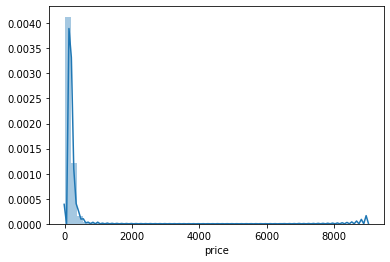

In [7]:
#Price per night, distribution
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

pd.plotting.register_matplotlib_converters()
sns.distplot(a=df['price'])

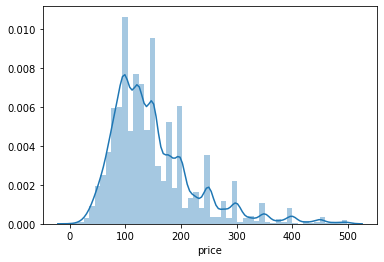

In [8]:
# As we have seen above, the distribution is very skewed to the left
# Here we want to see the distribution for prices below 500/night
df1 = df.loc[df.price < 500] 
sns.distplot(a=df1['price'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


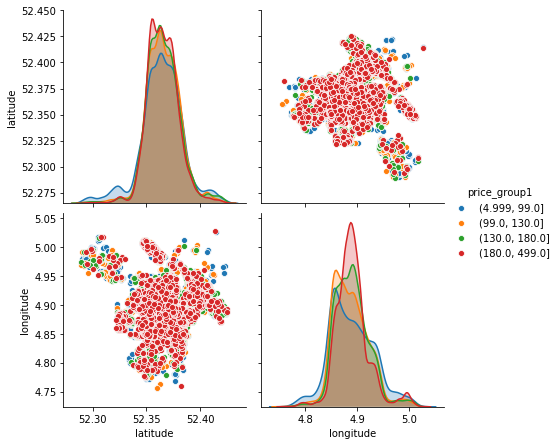

In [9]:
# We categorize the price into 4 groups to better see the price distribution across locations
df1['price_group1'] = pd.qcut(df1['price'], 4)
df1.groupby('price_group1').size()

sns.pairplot(df1, vars=['latitude', 'longitude'], hue="price_group1", height=3)

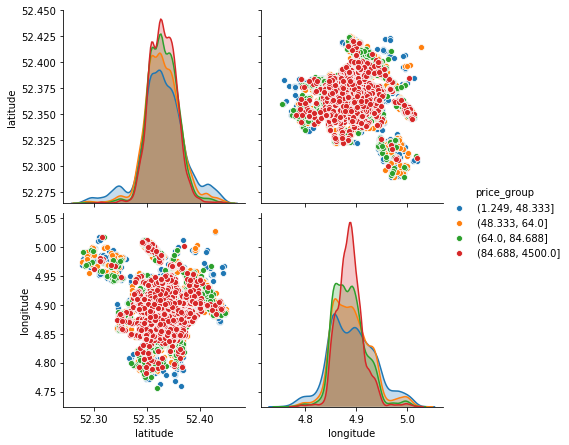

In [10]:
# Should we normalize the price/night to price/night/person?
# (We imagine that renting an entire house should cost much more expensive than renting a room...
# ...simply because a house accommodates more people)

df['cleaning_fee']=df['cleaning_fee'].fillna(0).astype(int)
df['extra_people']=df['extra_people'].fillna(0).astype(int)

df['price_night_person'] = (df['price']+df['cleaning_fee'])/df['accommodates']

# Now we re-plot the price group distribution across locations
df['price_group'] = pd.qcut(df['price_night_person'], 4)
df.groupby('price_group').size()

sns.pairplot(df, vars=['latitude', 'longitude'], hue="price_group", height=3)

In [11]:
print("Number of Zipcodes:", df['zipcode'].nunique())

Number of Zipcodes: 6958


It turned out that we did not see significant difference between the plots when we use price/night or price/night/person.

In [12]:
# We aggregate the zipcode from 4 digit + 2 alphabets to 4 digit only,
# to prevent overfitting when the zipcode is encoded to be one of the features

df = df.drop(df[df['zipcode'].isna() == True].index)
df['zipcode4'] = df['zipcode'].str[:4]
df = df.drop(df[pd.to_numeric(df['zipcode4'], errors = 'coerce').isna() == True].index)

In [13]:
print("Number of Zipcodes4:", df['zipcode4'].nunique())

Number of Zipcodes4: 95


In [14]:
# Amenities column is messy (no consistent separators), we chose to drop it from the dataframe because of 2 reasons:
## 1. Inconsistent separators need manual cleaning and this affects the reproducibility of the study
## 2. We have tried running the codes but it turned out that it needs approx. 18 hours to complete

'''
df['amenities'].head() #to see how messy it is

amenities = []
    
for x in df['amenities']:
    amenities.extend(str.split(x, sep='"'))
    
amenities = pd.Series(amenities)
amenities = amenities.str.replace('[{}]', '')
amenities

count_amenities = amenities.value_counts()
count_amenities

amenities1 = count_amenities[count_amenities.values == 1] #uncleaned

amenities4 = count_amenities[count_amenities.values != 1] #cleaned

amenities2 = pd.DataFrame(amenities1.index)
amenities2

amenities3 = []
for x in amenities2[0]:
    amenities3.extend(re.sub(r"([A-Z])",r" \1", x).split())

amenities3 = pd.Series(amenities3)
count_amenities3 = amenities3.value_counts()
count_amenities3

amenities2 = amenities4.append(amenities3)
amenities2

count_amenities2 = amenities2.value_counts()
count_amenities2

def unpack_amenities(df, column):
    for index, amenity in amenities2.iteritems():
        word = index
        word = word.replace('/', '')
        word = word.replace(' ', '_')
        word = word.replace('"', '')
        
        for index2, value in df[[column]].iterrows():
            df.loc[index2, 'has_' + word] = (index in str(value))
    
    return df

df_copy = df.copy()
df_copy = unpack_amenities(df_copy, 'amenities') #this specific line took longer than 18 hours to run
'''

'\ndf[\'amenities\'].head() #to see how messy it is\n\namenities = []\n    \nfor x in df[\'amenities\']:\n    amenities.extend(str.split(x, sep=\'"\'))\n    \namenities = pd.Series(amenities)\namenities = amenities.str.replace(\'[{}]\', \'\')\namenities\n\ncount_amenities = amenities.value_counts()\ncount_amenities\n\namenities1 = count_amenities[count_amenities.values == 1] #uncleaned\n\namenities4 = count_amenities[count_amenities.values != 1] #cleaned\n\namenities2 = pd.DataFrame(amenities1.index)\namenities2\n\namenities3 = []\nfor x in amenities2[0]:\n    amenities3.extend(re.sub(r"([A-Z])",r" \x01", x).split())\n\namenities3 = pd.Series(amenities3)\ncount_amenities3 = amenities3.value_counts()\ncount_amenities3\n\namenities2 = amenities4.append(amenities3)\namenities2\n\ncount_amenities2 = amenities2.value_counts()\ncount_amenities2\n\ndef unpack_amenities(df, column):\n    for index, amenity in amenities2.iteritems():\n        word = index\n        word = word.replace(\'/\', \'\

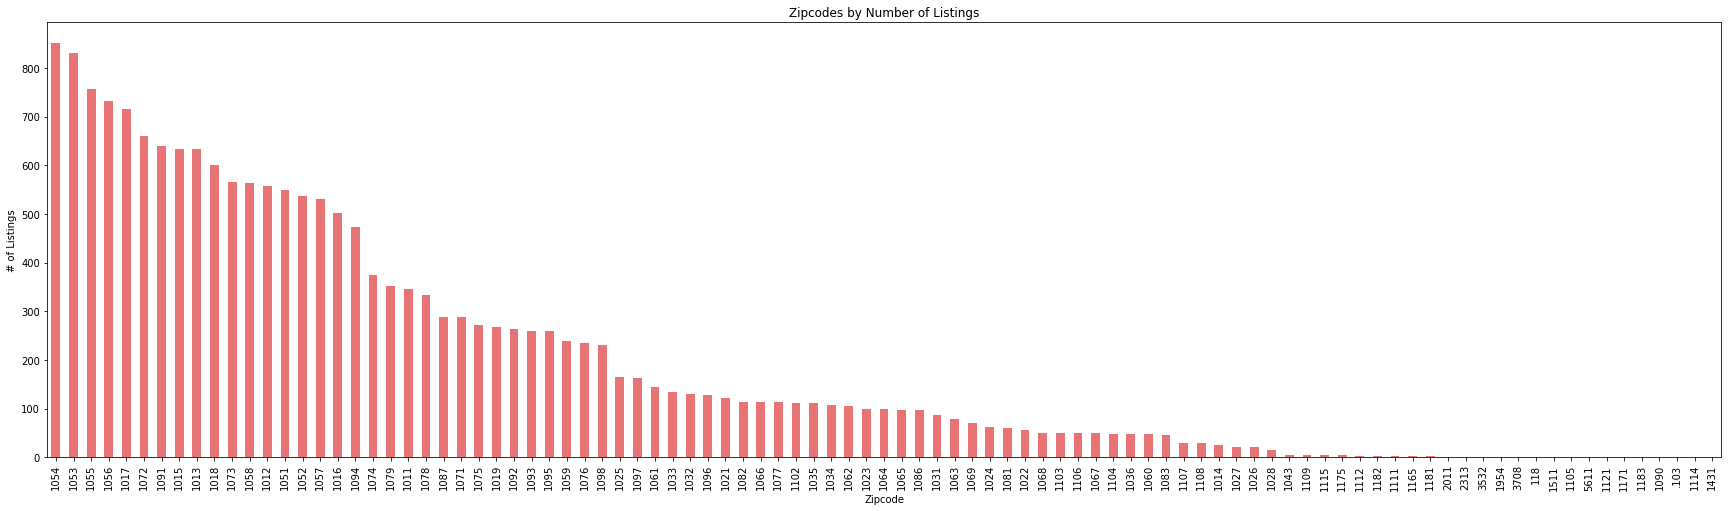

In [15]:
# Focus on listings per zipcode

count_per_zipcode = df['zipcode4'].value_counts()
ax = count_per_zipcode.plot(kind='bar', figsize = (30,8), color = '#E35A5C', alpha = 0.85)
ax.set_title("Zipcodes by Number of Listings")
ax.set_xlabel("Zipcode")
ax.set_ylabel("# of Listings")
plt.show()

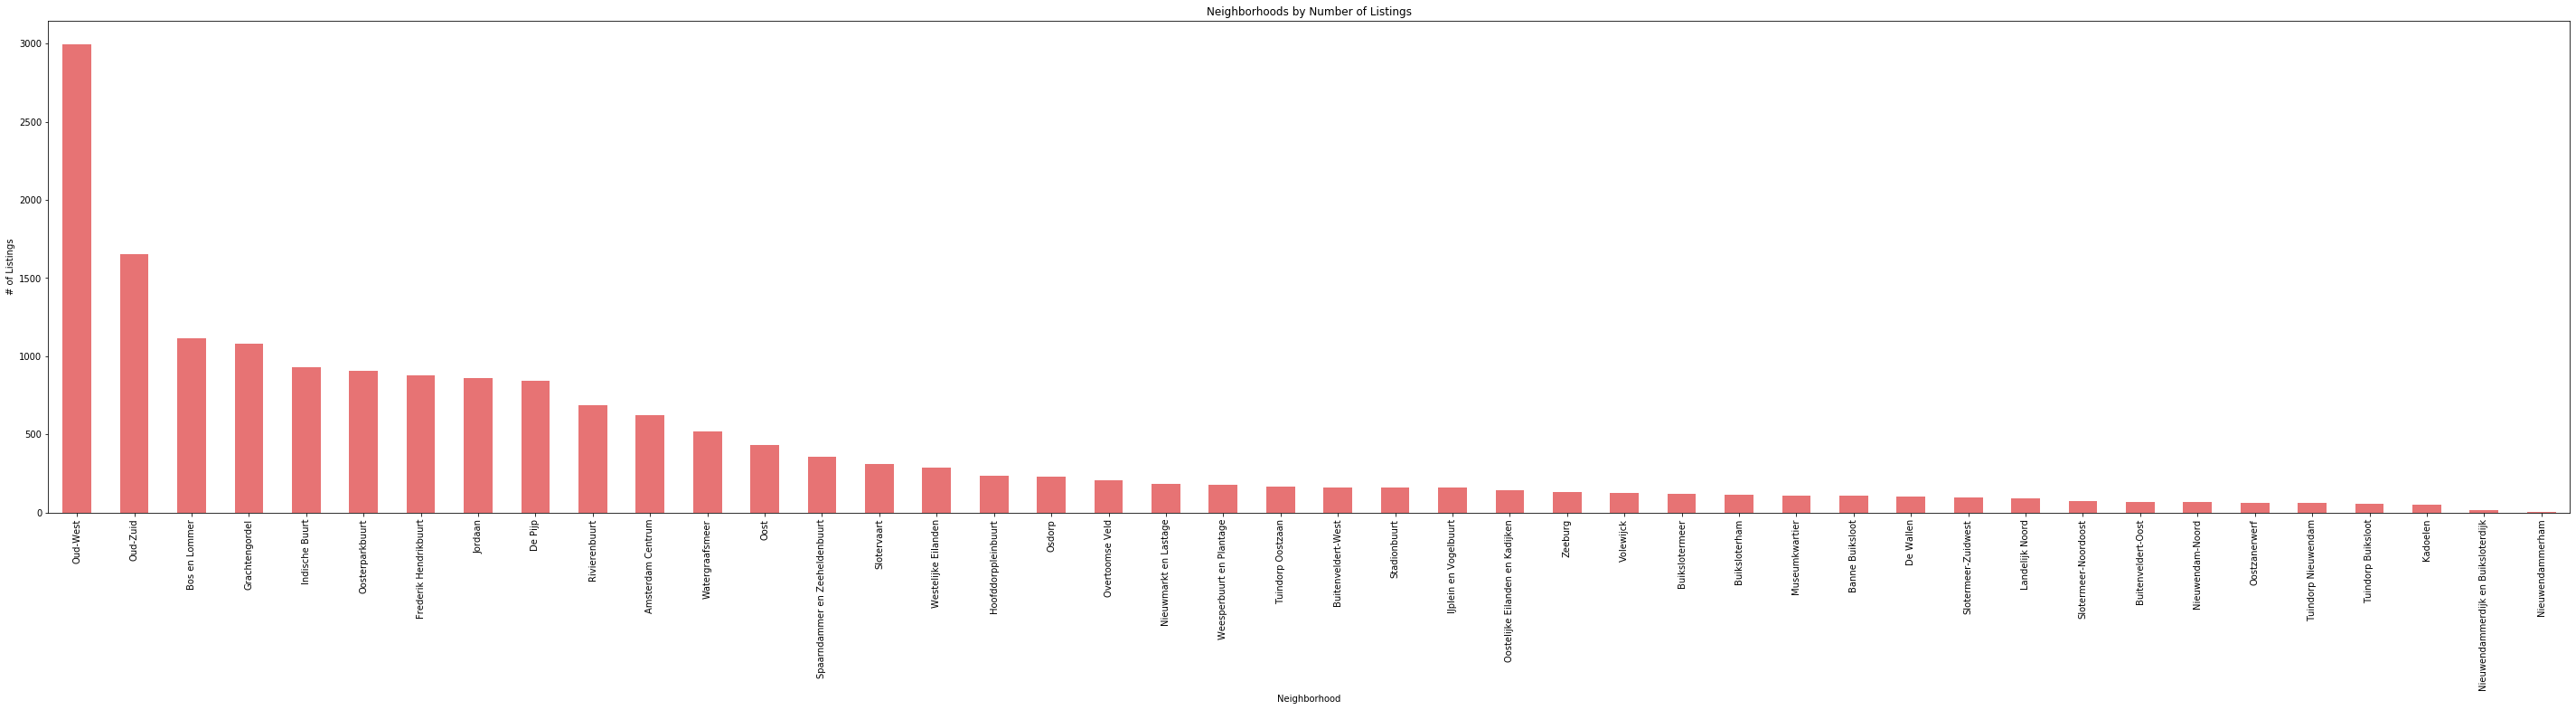

Number of Neighborhoods: 44


In [16]:
# Focus on neighbourhood_cleansed

# Get number of listings in neighborhoods
count_per_neighborhood = df['neighbourhood'].value_counts()

# Plot number of listings in each neighborhood
ax = count_per_neighborhood.plot(kind='bar', figsize = (50,10), color = '#E35A5C', alpha = 0.85)
ax.set_title("Neighborhoods by Number of Listings")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")
plt.show()

print("Number of Neighborhoods:", len(count_per_neighborhood))

In [17]:
# Columns that we obviously are not going to use for the analysis

notuse1 = ['scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'amenities','description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access','calendar_last_scraped', 'calendar_updated',
       'interaction', 'house_rules','host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'city', 'state', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'weekly_price', 'monthly_price']
df.drop(notuse1, axis=1, inplace=True)

In [18]:
# We can also delete the following features as they are only available for old Airbnb apartments.
# Suppose that we are a new host on Airbnb. At that time, we won't have any review score for an apartment,
# so we should remove any features related to this.

df.drop(df.filter(regex = 'review').columns, axis = 1, inplace = True)

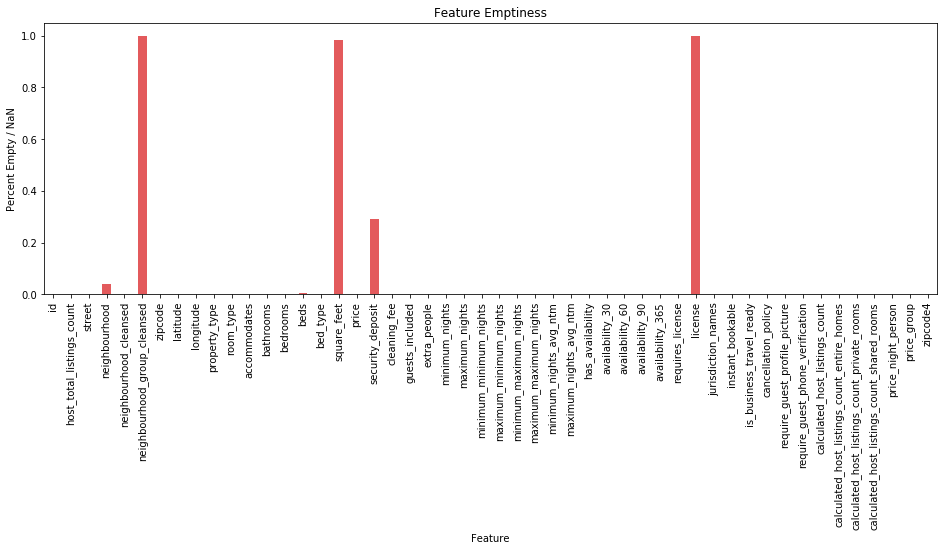

In [19]:
# We want to drop columns with many (more than 30%) missing values,
# first we have to see which columns match the criteria

import matplotlib.pyplot as plt
%matplotlib inline

percentage_missing_data = df.isnull().sum() / df.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [20]:
# Dropping columns with many missing values & homogeneous value
# e.g. all rows value in 'require_license' column are "f", not meaningful for the analysis

notuse2 = ['neighbourhood_group_cleansed', 'square_feet', 'requires_license', 'license', 'jurisdiction_names']
df.drop(notuse2, axis=1, inplace=True)

In [21]:
# We will drop street because the location dimension has already been handled by
# latitude, longitude, zipcode & neighborhood

notuse3 = ['street']
df.drop(notuse3, axis=1, inplace=True)

In [22]:
# Examine multicollinearity (among features/attributes)

import numpy as np
from sklearn import preprocessing

# Function to label encode categorical variables.
# Input: array (array of values)
# Output: array (array of encoded values)

def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
# Temporary dataframe
temp_data = df.copy()

# Delete additional entries with NaN values
temp_data = temp_data.dropna(axis=0)

# Encode categorical data
temp_data = temp_data.apply(encode_categorical)
# Compute matrix of correlation coefficients
corr_matrix = temp_data.corr()

corr_matrix

,id,host_total_listings_count,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,price_night_person,price_group,zipcode4
id,1.000000,0.129524,-0.007692,-0.025255,-0.006362,0.021728,-0.002511,0.010728,0.072553,-0.013621,...,-0.107508,-0.115023,-0.140151,0.169101,0.143640,0.073333,0.021347,0.061907,0.086538,-0.009380
host_total_listings_count,0.129524,1.000000,-0.034254,-0.038855,-0.048511,0.001938,0.001495,-0.037249,-0.034892,0.009322,...,0.137979,-0.008819,-0.006882,0.624577,0.661304,0.026085,0.000279,0.035073,0.089408,-0.048856
neighbourhood,-0.007692,-0.034254,1.000000,0.298741,0.215488,-0.188411,-0.004623,0.078417,-0.040204,0.031344,...,-0.007381,0.007212,0.005421,-0.051894,-0.023212,-0.064396,-0.005636,-0.049468,-0.063008,0.200412
neighbourhood_cleansed,-0.025255,-0.038855,0.298741,1.000000,0.378253,-0.071661,0.119820,0.038861,-0.044058,0.044293,...,-0.008499,-0.001873,-0.012916,-0.060374,-0.056144,-0.039745,-0.002759,-0.050641,-0.087939,0.404589
zipcode,-0.006362,-0.048511,0.215488,0.378253,1.000000,-0.640932,0.112125,-0.092667,-0.103883,-0.021640,...,-0.037856,-0.021112,-0.039431,-0.105805,-0.061063,-0.117631,-0.007209,-0.088113,-0.116993,0.992040
latitude,0.021728,0.001938,-0.188411,-0.071661,-0.640932,1.000000,0.041591,0.146712,0.051194,0.049164,...,-0.007687,0.004631,0.008588,0.021466,0.004585,0.038344,0.020896,0.001751,-0.059953,-0.612634
longitude,-0.002511,0.001495,-0.004623,0.119820,0.112125,0.041591,1.000000,0.084774,0.008111,0.052771,...,0.016835,-0.008017,-0.003887,0.010523,0.003196,0.011985,0.015343,0.012406,0.005535,0.149500
property_type,0.010728,-0.037249,0.078417,0.038861,-0.092667,0.146712,0.084774,1.000000,0.106575,0.179628,...,0.003902,0.022564,0.020336,-0.005998,-0.060826,0.066208,0.020619,0.026689,-0.045824,-0.091710
room_type,0.072553,-0.034892,-0.040204,-0.044058,-0.103883,0.051194,0.008111,0.106575,1.000000,-0.210268,...,-0.032943,0.013918,0.015718,0.043098,-0.190249,0.607604,0.090299,0.020048,-0.200942,-0.103885
accommodates,-0.013621,0.009322,0.031344,0.044293,-0.021640,0.049164,0.052771,0.179628,-0.210268,1.000000,...,0.090293,-0.002479,0.007550,0.029015,0.079424,-0.100485,-0.011393,-0.090223,-0.303339,-0.021525


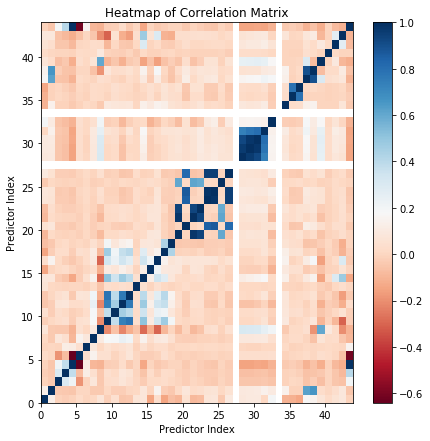

In [23]:
# Display heat map from the correlation matrix we produced before
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()

In [24]:
notuse4 = ['host_total_listings_count','has_availability','is_business_travel_ready',
           'neighbourhood_cleansed','neighbourhood','minimum_nights', 'maximum_nights',
           'minimum_minimum_nights', 'maximum_minimum_nights','bed_type',
           'minimum_maximum_nights', 'maximum_maximum_nights',
           'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','zipcode',
           'calculated_host_listings_count',
           'calculated_host_listings_count_entire_homes',
           'calculated_host_listings_count_private_rooms',
           'calculated_host_listings_count_shared_rooms']
df_processed = df.drop(notuse4, axis=1)

Skewness: 0.644120
Kurtosis: 3.302052


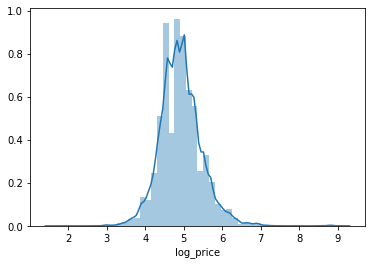

<Figure size 432x288 with 0 Axes>

In [25]:
# Check if log_price is normally distributed 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_processed['log_price']=np.log(df_processed['price'])
sns.distplot(df_processed['log_price'], kde=True,);
fig = plt.figure()
#res = stats.probplot(df_processed['log_price'], plot=plt)
print("Skewness: %f" % df_processed['log_price'].skew())
print("Kurtosis: %f" % df_processed['log_price'].kurt())

We can say that the price data follows a normal distribution.

Now, we would like to search for the determinants of price and to predict the price with different methods. Here we start with Linear Regression for the baseline model.

Produce Baseline Price Prediction Model

First we will create a simple baseline linear regression model predicting raw price (not log price) with all of the predictor variables. This will serve as oue baseline model to compare future models against. Before doing that, we need to convert our categorical predictor variables into binary flag variables, then split our data into train test splits. We will also scale our numeric variables, but we will handle that within the modeling pipeline. Scaling is not necessarily a requirement for standard linear regression, but we know we will use Ridge, Lasso and Random Forest.

In [26]:
# Here we try One-Hot Encoding for categorical variables
#instead of Label Encoding (which we will try later below)
categorical = ['id','property_type', 'room_type','instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'zipcode4']
numeric = ['id','latitude', 'longitude','accommodates','bathrooms', 'bedrooms',
          'price', 'security_deposit','cleaning_fee', 'guests_included',
          'extra_people', 'availability_30','availability_60','availability_90', 'availability_365']

for variables in numeric:
    df_processed[variables]=df_processed[variables].fillna(0).astype(int)

df_processed1 = pd.get_dummies(df_processed[categorical])
df_processed2 = df_processed[numeric]

# Merge the categorical & numeric data in one dataframe
df_clean = pd.merge(df_processed1, df_processed2, on='id')
df_clean = df_clean.drop('id',axis=1) # drop identifier (not useful for the analysis)

In [27]:
features = df_clean.columns.tolist()
display(features)

['property_type_Aparthotel',
 'property_type_Apartment',
 'property_type_Barn',
 'property_type_Bed and breakfast',
 'property_type_Boat',
 'property_type_Boutique hotel',
 'property_type_Bungalow',
 'property_type_Bus',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Campsite',
 'property_type_Casa particular (Cuba)',
 'property_type_Castle',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Cottage',
 'property_type_Dome house',
 'property_type_Earth house',
 'property_type_Farm stay',
 'property_type_Guest suite',
 'property_type_Guesthouse',
 'property_type_Hostel',
 'property_type_Hotel',
 'property_type_House',
 'property_type_Houseboat',
 'property_type_Island',
 'property_type_Lighthouse',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Serviced apartment',
 'property_type_Tiny house',
 'property_type_Tipi',
 'property_type_Townhouse',
 'property_type_Villa',
 'property_type_Yurt',
 'room_type_Entire home/apt',
 'room_type

In [107]:
len(features)

159

In [28]:
#Create X and y
X = df_clean

df_clean['log_price']=np.log(df_clean['price'])
y = df_clean[['price', 'log_price']]

In [29]:
#Create train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X, y, 
                                                     test_size = 0.3, 
                                                     random_state=17)

Next we will create a pipeline that handles scaling and modeling in one step. We will use MinMax instead of Standard scaler because we know most of our numeric variables do not follow a normal distribution, and are in fact skewed right (long tail to the right).

In [30]:
# Initialize MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Initialize Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

# Create pipeline
from sklearn.pipeline import Pipeline
pipeline_ols = Pipeline([("Scaler", scaler), ("Regression", regression)])

First, we will try Linear Regression with raw price (instead of log price) data as the dependent variable.

In [31]:
pipeline_ols.fit(X_train, y_train['price'])

Pipeline(memory=None,
         steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [32]:
#Calculate R-sq on train and test sets
ols_r2_train = pipeline_ols.score(X_train, y_train['price'])
ols_r2_test = pipeline_ols.score(X_test, y_test['price'])

In [33]:
#Calculate Mean Squared Error on test and train sets
from sklearn.metrics import mean_squared_error

x_train_pred = pipeline_ols.predict(X_train)
x_test_pred = pipeline_ols.predict(X_test)

mse_train = mean_squared_error(y_train['price'], x_train_pred)
mse_test = mean_squared_error(y_test['price'], x_test_pred)

In [34]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [35]:
scores_df = pd.DataFrame([{'Model':'OLS_RawPrice', 'R2_train':ols_r2_train, 'R2_test':ols_r2_test, 
                          'RMSE_train':rmse_train, 'RMSE_test':rmse_test}])

In [36]:
scores_df[['Model', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']]

,Model,R2_train,R2_test,RMSE_train,RMSE_test
0,OLS_RawPrice,1.0,1.0,8.064789e-13,0.09971


In [37]:
coefficients = pd.DataFrame({"Feature":X_train.columns, 
                             "Coefficients_RawPrice":np.transpose(pipeline_ols.named_steps['Regression'].coef_)})

coefficients[coefficients['Coefficients_RawPrice']!=0].count()

Feature                  160
Coefficients_RawPrice    160
dtype: int64

In [38]:
coefficients

,Feature,Coefficients_RawPrice
0,property_type_Aparthotel,7.001229e+00
1,property_type_Apartment,7.001229e+00
2,property_type_Barn,7.001229e+00
3,property_type_Bed and breakfast,7.001229e+00
4,property_type_Boat,7.001229e+00
...,...,...
155,availability_30,-1.108447e-12
156,availability_60,2.394529e-12
157,availability_90,-1.428191e-12
158,availability_365,3.055334e-13


Our model has many (160) input variables, therefore feature selection will need to be performed to fine-tune this model.

R-square for both train and test are very high (close to 1.0), only when observing RMSE we know that R-square decreases from train to test (marked with increasing RMSE).

Fit Model on Log Price using Trimmed Variables

Next we will test running the model on the log of price (instead of raw price), to see if this improves anything.

In [39]:
pipeline_ols.fit(X_train, y_train['log_price'])

Pipeline(memory=None,
         steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('Regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [40]:
#Calculate R-sq on train and test sets
ols_r2_train = pipeline_ols.score(X_train, y_train['log_price'])
ols_r2_test = pipeline_ols.score(X_test, y_test['log_price'])

In [41]:
#Calculate Mean Squared Error on test and train sets
x_train_pred = pipeline_ols.predict(X_train)
x_test_pred = pipeline_ols.predict(X_test)

mse_train = mean_squared_error(np.exp(y_train['log_price']), np.exp(x_train_pred))
mse_test = mean_squared_error(np.exp(y_test['log_price']), np.exp(x_test_pred))

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [42]:
scores_df = scores_df.append(pd.DataFrame([{'Model':'OLS_LogPrice', 'R2_train':ols_r2_train, 'R2_test':ols_r2_test, 
                          'RMSE_train':rmse_train, 'RMSE_test':rmse_test}]))

In [43]:
scores_df[['Model', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']]

,Model,R2_train,R2_test,RMSE_train,RMSE_test
0,OLS_RawPrice,1.0,1.000000,8.064789e-13,0.099710
0,OLS_LogPrice,1.0,0.999997,1.411063e-12,1.596282


Interestingly, R-square slightly decreases when we use log price instead of raw price. However going forward, we will use Log Price in our models so that we will be able to compare the MSE from this OLS to future models (Lasso, Ridge and Random Forest).

In [44]:
coefficients_log = pd.DataFrame({"Feature":X_train.columns, 
                             "Coefficients_LogPrice":np.transpose(pipeline_ols.named_steps['Regression'].coef_)})

coefficients_log[coefficients_log['Coefficients_LogPrice']!=0].count()

Feature                  160
Coefficients_LogPrice    160
dtype: int64

In [45]:
coefficients = coefficients.merge(coefficients_log)
coefficients

,Feature,Coefficients_RawPrice,Coefficients_LogPrice
0,property_type_Aparthotel,7.001229e+00,-1.194615e-02
1,property_type_Apartment,7.001229e+00,-1.194615e-02
2,property_type_Barn,7.001229e+00,-1.194615e-02
3,property_type_Bed and breakfast,7.001229e+00,-1.194615e-02
4,property_type_Boat,7.001229e+00,-1.194615e-02
...,...,...,...
155,availability_30,-1.108447e-12,6.470519e-16
156,availability_60,2.394529e-12,-2.220446e-16
157,availability_90,-1.428191e-12,-1.103284e-15
158,availability_365,3.055334e-13,6.418477e-16


The model has many predictors, so next we will perform feature selection steps to see whether we can eliminate any of them.

Lasso Model

We would like to reduce the number of predictor variables we are feeding into the model to reduce complexity. To reach that goal we are going to try Lasso, because we know it can shrink many predictors to 0.

We will use GridSearchCV to iterate through different values of alpha and choose the one that reduces complexity while not impacting MSE too significantly.

In [46]:
# Here we encode the categorical variables (property type, room type and cancellation policy)
# that we are going to use as predictors in the model

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_variables = ['id','property_type','room_type','cancellation_policy','zipcode4','require_guest_profile_picture','require_guest_phone_verification']

for category in categorical_variables:
    encoder.fit(df[category].unique().tolist())
    df[category] = encoder.transform(df[category].tolist())

numeric = ['id','latitude', 'longitude','accommodates','bathrooms', 'bedrooms',
          'price', 'security_deposit','cleaning_fee', 'guests_included',
          'extra_people', 'availability_30','availability_60','availability_90', 'availability_365']

for variables in numeric:
    df_processed[variables]=df_processed[variables].fillna(0).astype(int)
    

df_processed1 = pd.get_dummies(df_processed[categorical])
df_processed2 = df_processed[numeric]

# Merge the categorical & numeric data in one dataframe
df_clean2 = pd.merge(df_processed1, df_processed2, on='id')
df_clean2 = df_clean2.drop(columns = 'id') # drop identifier 'id' (not useful for the analysis)


In [112]:
features2 = df_clean2.columns.tolist()
features2

['property_type_Aparthotel',
 'property_type_Apartment',
 'property_type_Barn',
 'property_type_Bed and breakfast',
 'property_type_Boat',
 'property_type_Boutique hotel',
 'property_type_Bungalow',
 'property_type_Bus',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Campsite',
 'property_type_Casa particular (Cuba)',
 'property_type_Castle',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Cottage',
 'property_type_Dome house',
 'property_type_Earth house',
 'property_type_Farm stay',
 'property_type_Guest suite',
 'property_type_Guesthouse',
 'property_type_Hostel',
 'property_type_Hotel',
 'property_type_House',
 'property_type_Houseboat',
 'property_type_Island',
 'property_type_Lighthouse',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Serviced apartment',
 'property_type_Tiny house',
 'property_type_Tipi',
 'property_type_Townhouse',
 'property_type_Villa',
 'property_type_Yurt',
 'room_type_Entire home/apt',
 'room_type

In [109]:
len(features2)

160

In [48]:
#Initialize MinMaxScaler
scaler = MinMaxScaler()

#Initialize Lasso
from sklearn.linear_model import Lasso
lasso = Lasso()

#Create pipeline
pipeline_lasso = Pipeline([("Scaler", scaler), ("Lasso", lasso)])

#Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
alphas = np.arange(0.01, 1, 0.01)
search_space = [{"Lasso__alpha" : alphas}]
gridsearch_lasso = GridSearchCV(pipeline_lasso, search_space, cv=5, verbose=0, n_jobs=-1)

In [49]:
df_clean2['log_price']=np.log(df_clean2['price'])
y = df_clean2['log_price']
X = df_clean2[features2]

#Create train-test split
X_train, X_test, y_train,  y_test = train_test_split(X, y, 
                                                     test_size = 0.3, 
                                                     random_state=17)

In [50]:
best_lasso = gridsearch_lasso.fit(X_train, y_train)

In [51]:
best_lasso.best_estimator_.get_params()['Lasso__alpha']

0.01

In [52]:
#Calculate R-sq on train and test sets
lasso_r2_train = best_lasso.best_estimator_.score(X_train, y_train)
lasso_r2_test = best_lasso.best_estimator_.score(X_test, y_test)

In [53]:
#Calculate Mean Squared Error on test and train sets
x_train_pred = best_lasso.best_estimator_.predict(X_train)
x_test_pred = best_lasso.best_estimator_.predict(X_test)


mse_train = mean_squared_error(np.exp(y_train), np.exp(x_train_pred))
mse_test = mean_squared_error(np.exp(y_test), np.exp(x_test_pred))

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [54]:
scores_df = pd.DataFrame([{'Model':'Lasso_LogPrice', 'R2_train':lasso_r2_train, 'R2_test':lasso_r2_test, 
                          'RMSE_train':rmse_train, 'RMSE_test':rmse_test}])

In [55]:
scores_df[['Model', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']]

,Model,R2_train,R2_test,RMSE_train,RMSE_test
0,Lasso_LogPrice,0.289808,0.29635,207.210778,250.200731


In [56]:
coefficients_Lasso = pd.DataFrame({"Feature":X_train.columns, 
                             "Coefficients_LogPrice_Lasso":np.transpose(best_lasso.best_estimator_.named_steps.Lasso.coef_)})

coefficients_Lasso[coefficients_Lasso['Coefficients_LogPrice_Lasso']!=0].count()

Feature                        8
Coefficients_LogPrice_Lasso    8
dtype: int64

In [57]:
coefficients = coefficients_Lasso
coefficients

,Feature,Coefficients_LogPrice_Lasso
0,property_type_Aparthotel,0.000000
1,property_type_Apartment,-0.089099
2,property_type_Barn,-0.000000
3,property_type_Bed and breakfast,0.000000
4,property_type_Boat,0.000000
...,...,...
153,extra_people,0.000000
154,availability_30,0.000000
155,availability_60,0.000000
156,availability_90,0.109549


In [58]:
lasso_vars = list(coefficients[coefficients['Coefficients_LogPrice_Lasso'] != 0]['Feature'])

In [59]:
from sklearn.linear_model import Ridge
#Initialize Ridge
ridge = Ridge()

#Create pipeline
pipeline_ridge = Pipeline([("Scaler", scaler), ("Ridge", ridge)])

#Initialize GridSearchCV
alphas = np.arange(0.01, 5, 0.01)
search_space = [{"Ridge__alpha" : alphas}]
gridsearch_ridge_all = GridSearchCV(pipeline_ridge, search_space, cv=5, verbose=0, n_jobs=-1)
gridsearch_ridge_lasso = GridSearchCV(pipeline_ridge, search_space, cv=5, verbose=0, n_jobs=-1)

In [60]:
best_ridge_AllVars = gridsearch_ridge_all.fit(X_train, y_train)

In [61]:
import pickle

filename1 = "best_ridge_AllVars_model.sav"
pickle.dump(best_ridge_AllVars, open(filename1, 'wb'))

In [62]:
filename1 = "best_ridge_AllVars_model.sav"
best_ridge_AllVars = pickle.load(open(filename1, 'rb'))

In [63]:
best_ridge_AllVars.best_estimator_.get_params()['Ridge__alpha']

2.1999999999999997

In [64]:
#Calculate R-sq on train and test sets
ridge_r2_train = best_ridge_AllVars.best_estimator_.score(X_train, y_train)
ridge_r2_test = best_ridge_AllVars.best_estimator_.score(X_test, y_test)

In [69]:
#Calculate Mean Squared Error on test and train sets
x_train_pred = best_ridge_AllVars.best_estimator_.predict(X_train)
x_test_pred = best_ridge_AllVars.best_estimator_.predict(X_test)

mse_train = mean_squared_error(np.exp(y_train), np.exp(x_train_pred))
mse_test = mean_squared_error(np.exp(y_test), np.exp(x_test_pred))

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [70]:
scores_df = scores_df.append(pd.DataFrame([{'Model':'Ridge_LogPrice_AllVars', 'R2_train':ridge_r2_train, 'R2_test':ridge_r2_test, 
                          'RMSE_train':rmse_train, 'RMSE_test':rmse_test}]))

In [71]:
#Define coefficients to add to coefficients data frame
coefficients_ridge_all_vars = pd.DataFrame({"Feature":X_train.columns,
                                           "Coefficients_Ridge_AllVars":np.transpose(best_ridge_AllVars.best_estimator_.named_steps['Ridge'].coef_)})

In [72]:
coefficients = coefficients.merge(coefficients_ridge_all_vars)

Now we will try fitting Ridge with Lasso model

In [73]:
#Fit Ridge with Lasso Model
best_ridge_LassoVars = gridsearch_ridge_lasso.fit(X_train[lasso_vars], y_train)

In [74]:
filename2 = "best_ridge_LassoVars.sav"
pickle.dump(best_ridge_LassoVars, open(filename2, 'wb'))

In [75]:
# Read in model from saved pickle file
filename = "best_ridge_LassoVars.sav"
best_ridge_LassoVars = pickle.load(open(filename, 'rb'))

In [76]:
best_ridge_LassoVars.best_estimator_.get_params()['Ridge__alpha']

0.13

In [77]:
# Calculate R-sq on train and test sets
ridge_r2_train = best_ridge_LassoVars.best_estimator_.score(X_train[lasso_vars], y_train)
ridge_r2_test = best_ridge_LassoVars.best_estimator_.score(X_test[lasso_vars], y_test)

In [78]:
# Calculate Mean Squared Error on test and train sets
x_train_pred = best_ridge_LassoVars.best_estimator_.predict(X_train[lasso_vars])
x_test_pred = best_ridge_LassoVars.best_estimator_.predict(X_test[lasso_vars])

mse_train = mean_squared_error(np.exp(y_train), np.exp(x_train_pred))
mse_test = mean_squared_error(np.exp(y_test), np.exp(x_test_pred))

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

In [79]:
scores_df = scores_df.append(pd.DataFrame([{'Model':'Ridge_LogPrice_LassoVars', 'R2_train':ridge_r2_train, 'R2_test':ridge_r2_test, 
                          'RMSE_train':rmse_train, 'RMSE_test':rmse_test}]))

In [80]:
scores_df[['Model', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']]

,Model,R2_train,R2_test,RMSE_train,RMSE_test
0,Lasso_LogPrice,0.289808,0.296350,207.210778,250.200731
0,Ridge_LogPrice_AllVars,0.487081,0.491288,200.412854,241.105343
0,Ridge_LogPrice_LassoVars,0.357934,0.377637,207.456919,247.733779


In [81]:
# Define coefficients to add to coefficients data frame (for comparisons)

coefficients_ridge_lasso_vars = pd.DataFrame({"Feature":X_train[lasso_vars].columns,
                                           "Coefficients_Ridge_LassoVars":np.transpose(best_ridge_LassoVars.best_estimator_.named_steps['Ridge'].coef_)})

In [82]:
coefficients = coefficients.merge(coefficients_ridge_lasso_vars, how='left')

In [83]:
coefficients

,Feature,Coefficients_LogPrice_Lasso,Coefficients_Ridge_AllVars,Coefficients_Ridge_LassoVars
0,property_type_Aparthotel,0.000000,0.291561,NaN
1,property_type_Apartment,-0.089099,-0.117914,-0.072652
2,property_type_Barn,-0.000000,-0.179104,NaN
3,property_type_Bed and breakfast,0.000000,-0.009164,NaN
4,property_type_Boat,0.000000,-0.111769,NaN
...,...,...,...,...
153,extra_people,0.000000,-0.129336,NaN
154,availability_30,0.000000,-0.117281,NaN
155,availability_60,0.000000,0.012571,NaN
156,availability_90,0.109549,0.242359,0.147632


In [84]:
#Exponentiate coefficients for direct interpretation (effect on the change of price)

coefficients_exp = coefficients.copy()

coefficients_exp.Coefficients_LogPrice_Lasso = np.exp(coefficients_exp.Coefficients_LogPrice_Lasso)
coefficients_exp.Coefficients_Ridge_AllVars = np.exp(coefficients_exp.Coefficients_Ridge_AllVars)
coefficients_exp.Coefficients_Ridge_LassoVars = np.exp(coefficients_exp.Coefficients_Ridge_LassoVars)

coefficients_exp['Coefficients_Ridge_AllVars_%Change'] = (coefficients_exp.Coefficients_Ridge_AllVars - 1) * 100

coefficients_exp[["Feature", "Coefficients_Ridge_AllVars", "Coefficients_Ridge_AllVars_%Change"]].sort_values("Coefficients_Ridge_AllVars", ascending=False)

,Feature,Coefficients_Ridge_AllVars,Coefficients_Ridge_AllVars_%Change
147,accommodates,4.864673,386.467287
149,bedrooms,3.332506,233.250601
148,bathrooms,1.982358,98.235806
151,cleaning_fee,1.963589,96.358922
45,cancellation_policy_super_strict_60,1.920670,92.066956
...,...,...,...
66,zipcode4_1027,0.751652,-24.834837
121,zipcode4_1106,0.745692,-25.430838
74,zipcode4_1043,0.731444,-26.855606
122,zipcode4_1107,0.708131,-29.186862


RANDOM FOREST - BAGGING - DECISION TREE

1. RANDOM FOREST

In [86]:
# Shuffle the data to ensure a good distribution for the training and testing sets
from sklearn.utils import shuffle
df_clean2 = shuffle(df_clean2)

# Extract features and labels
y = df_clean2['price']
X = df_clean2.drop('price', axis = 1)

# Training and Testing Sets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((13864, 159), (4622, 159))

In [87]:
# We first create a pipeline that imputes the missing values then scales the data and finally applies the model,
# then fit this pipeline to the training set.

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline (imputer + scaler + regressor)
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)
my_pipeline_RF = make_pipeline(RandomForestRegressor(random_state=42))

# Fit the model
my_pipeline_RF.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [88]:
# Evaluation of the model

from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE)) 

In [89]:
evaluate_model(my_pipeline_RF, test_X, test_y)

Median Absolute Error: 0.0
RMSE: 45.42


In [90]:
# Evaluate the model on the training set too, to be sure that we have avoided overfitting.

evaluate_model(my_pipeline_RF, train_X, train_y)

Median Absolute Error: 0.0
RMSE: 8.72


In [91]:
importances = my_pipeline_RF.steps[0][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(10)

,feature,importance
158,log_price,0.989261
41,cancellation_policy_flexible,0.002197
43,cancellation_policy_strict_14_with_grace_period,0.001911
157,availability_365,0.001078
153,extra_people,0.000752
156,availability_90,0.000676
37,room_type_Private room,0.000652
1,property_type_Apartment,0.000610
151,cleaning_fee,0.000500
149,bedrooms,0.000381


In [92]:
feature_importances.importance.sum()

1.0

2. BAGGING

In [93]:
from sklearn.model_selection import train_test_split
train_X, validation_X, train_y, validation_y = train_test_split(X, y, test_size=0.30, random_state = 42)

print("Training set: Xt:{} Yt:{}".format(train_X.shape, train_y.shape)) 
print("Validation set: Xv:{} Yv:{}".format(validation_X.shape, validation_y.shape)) 
print("-") 
print("Full dataset: X:{} Y:{}".format(X.shape, y.shape))

Training set: Xt:(12940, 159) Yt:(12940,)
Validation set: Xv:(5546, 159) Yv:(5546,)
-
Full dataset: X:(18486, 159) Y:(18486,)


In [94]:
from sklearn.ensemble import BaggingRegressor
# let us set a maximum of 1000 trees in our forest - bagging
amsterdam_model = BaggingRegressor(n_estimators = 1000, random_state = 42, max_features=10) #max features should be 101
amsterdam_model.fit(train_X, train_y)

predictions = amsterdam_model.predict(validation_X)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(validation_y, predictions)

67.01925430103728

In [95]:
from lightgbm import LGBMRegressor

In [96]:
LGBM = LGBMRegressor(num_leaves=31, boosting_type='gbdt',num_iteration=10000) #boosting
LGBM.fit(train_X,train_y)
preds = LGBM.predict(validation_X)
mean_absolute_error(validation_y, preds)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


4.181344844551975

In [97]:
mean_absolute_error(validation_y, predictions)

67.01925430103728

3. DECISION TREE

In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

In [99]:
clf = DecisionTreeRegressor( splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5) 

# Train Decision Tree Classifer
clf = clf.fit(train_X,train_y)

# Predict the response for test dataset
y_pred = clf.predict(validation_X)

# Model Accuracy: how often is the classifier correct?
mean_absolute_error(validation_y, y_pred)


20.57172201310657

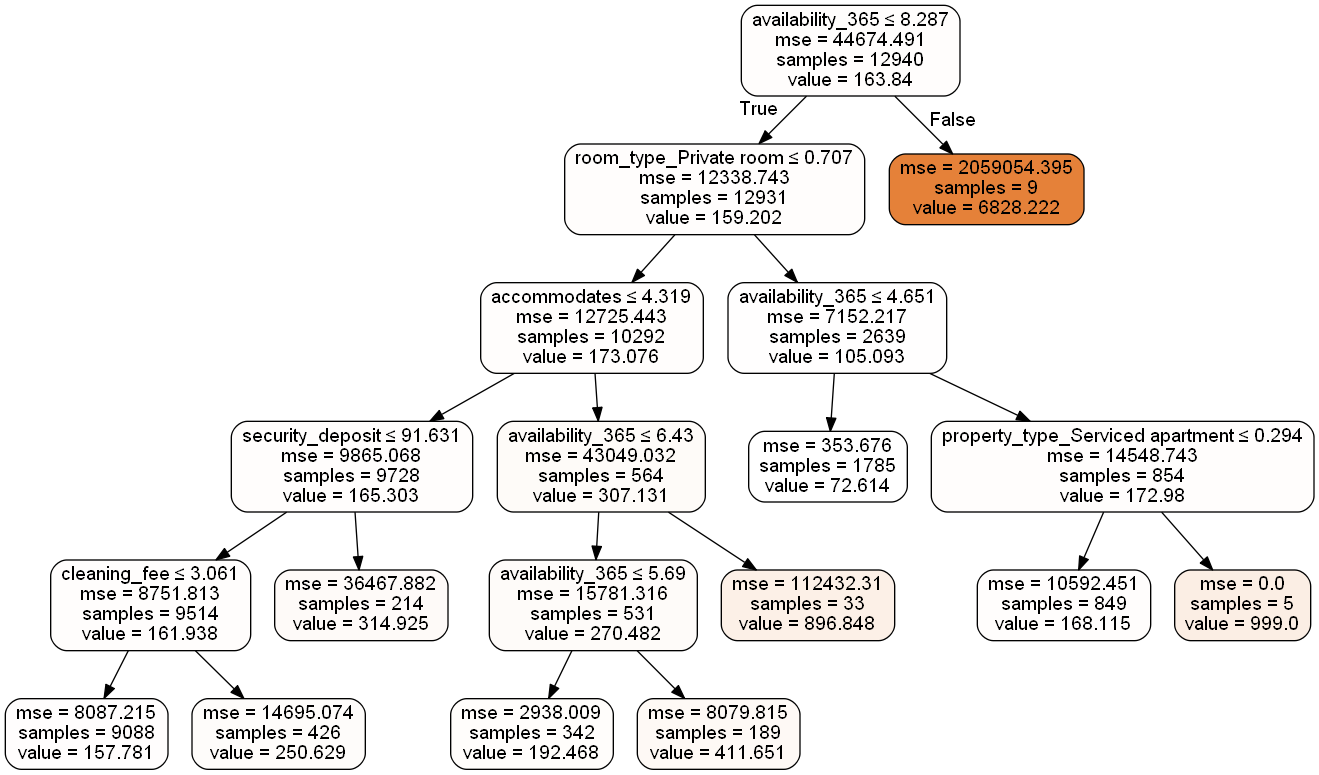

In [114]:
from sklearn.tree import export_graphviz #Visualizing Decision Trees
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt.png')
Image(graph.create_png())

In [105]:
# Here we prune the decision tree because we need to
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


depth = []
for i in range(3,20):
    clf = DecisionTreeRegressor(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=train_X, y=train_y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.2854662979480892), (4, 0.5287301880824522), (5, 0.4930174877599605), (6, 0.5498825348309192), (7, 0.6150103158416441), (8, 0.30501222380622367), (9, 0.12300381456881812), (10, -0.09752928867227315), (11, 0.07558729519106062), (12, 0.019747969278506146), (13, 0.17392513940089746), (14, 0.032426857765339524), (15, -0.0097971115137768), (16, 0.2145887041423625), (17, 0.053540497712031856), (18, -0.03641518134440003), (19, 0.02772587751359425)]


In [106]:
a=[depth[i][0] for i in range(len(depth))]
b=[depth[i][1] for i in range(len(depth))]

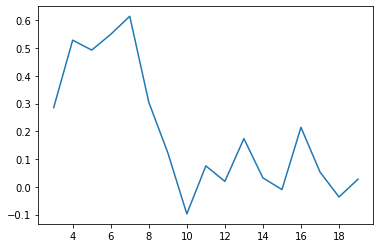

In [107]:
graph=plt.plot(a,b) # we obtained the min point at 10

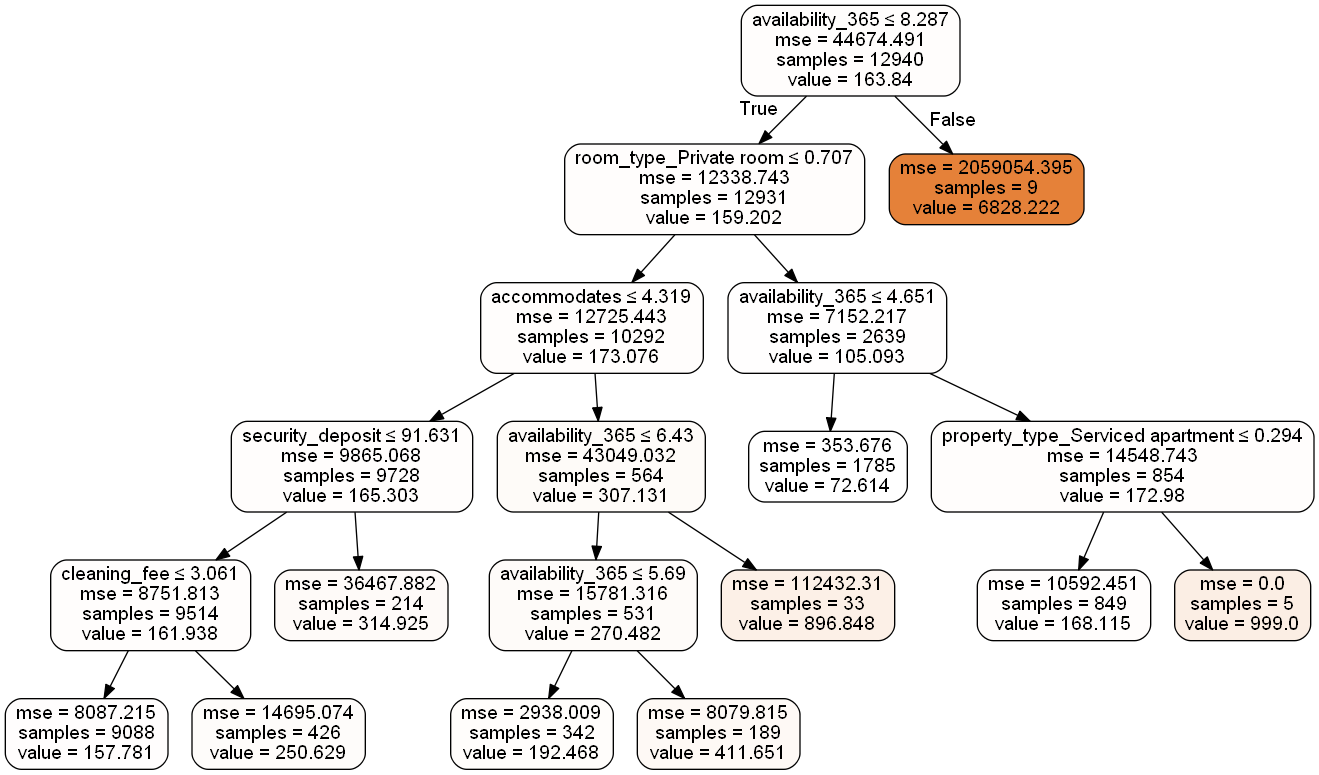

In [113]:
#The new tree should be as following
clf = DecisionTreeRegressor( splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5) #setting node=18

# Train Decision Tree Classifer
clf = clf.fit(train_X,train_y)

#Predict the response for test dataset
y_pred = clf.predict(validation_X)

# Model Accuracy, how often is the classifier correct?
mean_absolute_error(validation_y, y_pred)

from sklearn.tree import export_graphviz #Visualizing Decision Trees
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt.png')
Image(graph.create_png())

In [104]:
asd = train_X.columns.tolist()
set(features2) - set(asd)

set()

In [110]:
len(features2)

160

# Robustness analysis (0.5 points)

How robust are your results? Think of things like:

* outliers in the data
* different specification of regression, neural network etc.
* split of data in train, validation and test data.

Because our project runs and compares different methods for the same objective (predicting nightly price), we believe that the robustness analysis has been implicitly covered in the previous section.

# Discussion and conclusion (0.5 points)

What did you find in the analysis above; what is the answer to the question you started out with.

What are weaknesses of your approach that can be improved upon in future research (e.g. in your thesis).



We found that Random Forest gives the best predition.Each method has advantages and disadvantages. For the random forest: it handles higher dimensionality data very well and it handles missing values and maintains accuracy for missing data. Disadvantages of using this method is since final prediction is based on the mean predictions from subset trees, it won’t give precise values for the regression model. Bagging is also similar to random forest except that it uses the aggregation of multiple versions of a predicted model. Bagging effectively reduces the variance by aggregating. It builds individual models seperatly and gives the equal weight to those models, however giving equal weight to all models which do not have equal predictive power may be disadvantage. For the boosting, advantage is it upports different loss function and orks well with interactions. Disadvantages of boosting is it prones to over-fitting and it requires careful tuning of different hyper-parameters.


In the future research, we hope that we could include Amenities column because it surely provides rich information as the determinants of the nightly Airbnb price.